<a href="https://colab.research.google.com/github/bigDataNCloud/mgmt_467_resources/blob/main/Unit1_Labs/Lab_3_Data_Visualization_Dashboarding/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**
The core difference between exploratory and explanatory visualization lies in their purpose and audience.

Exploratory visualization is used to find a story within the data, while explanatory visualization is used to tell a specific story to an audience

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  A bar chart is used to display and easily compare the size or magnitude of values across distinct, unconnected categories.
   - Question archetype:  Relationship/Correlation (ex:Is there a correlation between two numeric variables, and are there outliers?)
   - Data shape:  Two Quantitative variables (one for the X-axis, one for the Y-axis). Can encode a third variable using point size (Bubble Chart).
   - Pitfalls:  Overplotting (too many points overlapping and obscuring the overall pattern). Misinterpretation of correlation as causation.
   - Alternatives:  Heatmap for correlation matrices or binned scatter data, Bubble Chart when a third quantitative variable is important, Table for precise comparison of small data sets.
2. **Line:**  A line chart is ideal for visualizing trends or continuous change over a sequential axis, most often time, to show movement and direction.
3. **Scatter:**  A scatter plot serves to examine the relationship or correlation between two quantitative variables, helping to identify patterns, clusters, and outliers.
4. **Histogram:**  A histogram is used to illustrate the distribution of a single continuous numeric variable, showing how frequently values fall into specific ranges (bins).
5. **Map:**  A map visualization is necessary to show how data values or patterns are spatially distributed across a geographic area, highlighting location-based insights.

---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI:  On-Time Performance (OTP) Rate
   - Why it matters:   It measures the percentage of flights arriving within 15 minutes of the scheduled time.
   - Best chart: Gauge Chart
   - Drill-down fields: Line Chart showing OTP Trend over Time (by day/week), Bar Chart comparing OTP by Hub Airport, and by Aircraft Type.
2. KPI:  Load Factor (LF) 🧑‍🤝‍🧑
-Why it matters: Load Factor (Revenue Passenger Miles / Available Seat Miles) measures how efficiently the airline is filling its seats. It's the primary indicator of revenue maximization per flight.
- Best chart: Line Chart with a target line.
- Drill-down fields: Stacked Bar Chart showing LF by Route
3. KPI:  Yield(Revenue per Passenger Mile)
Why it matters: Yield measures the average dollar amount generated per passenger per mile flown. This is the top indicator of pricing and revenue strategy effectiveness, factoring in ticket price, discounts, and route mix.
Best chart: Line Chart with a comparison to the Cost per Available Seat Mile (CASM).
Drill-down fields: Bar Chart showing Yield by Fare Class and by Geographic Region to pinpoint where profitable pricing is succeeding or failing.
4. KPI:  Average Delay Minutes (ADM) per Flight
Why it matters: This operational metric is a direct cost driver for fuel, maintenance, and crew time, and is a strong predictor of customer dissatisfaction.
Best chart: Histogram or Box Plot.
Drill-down fields: Bar Chart showing ADM by Delay Cause Code and by Time of Day
5. KPI: Cancellation Rate
Why it matters: Completion Factor (Flights Flown / Flights Scheduled) is the ultimate metric for reliability. Cancellations are the single biggest driver of customer churn and massive rebooking/recovery costs.
Best chart: Table or Small Multiple of Gauge Charts across key hubs.
Drill-down fields: Bar Chart showing Cancellation Count by Primary Reason (maintenance, crew, weather) and Geographical Map highlighting the Airports responsible for the highest number of cancellations.


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


<function matplotlib.pyplot.show(close=None, block=None)>

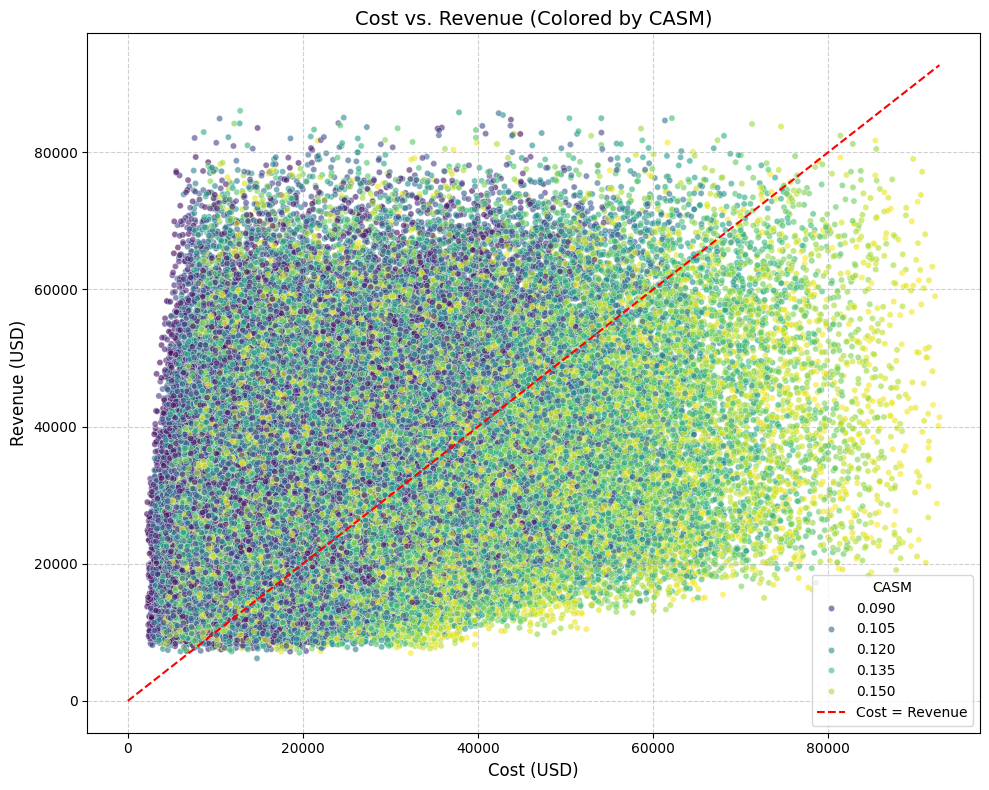

In [ ]:
#Prompt E
# Plotting scatter plot of cost vs. revenue colored by casm
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', s=20, alpha=0.6)

# Add a diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Cost = Revenue')

plt.title('Cost vs. Revenue (Colored by CASM)', fontsize=14)
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.legend(title='CASM')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1083916706.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis')


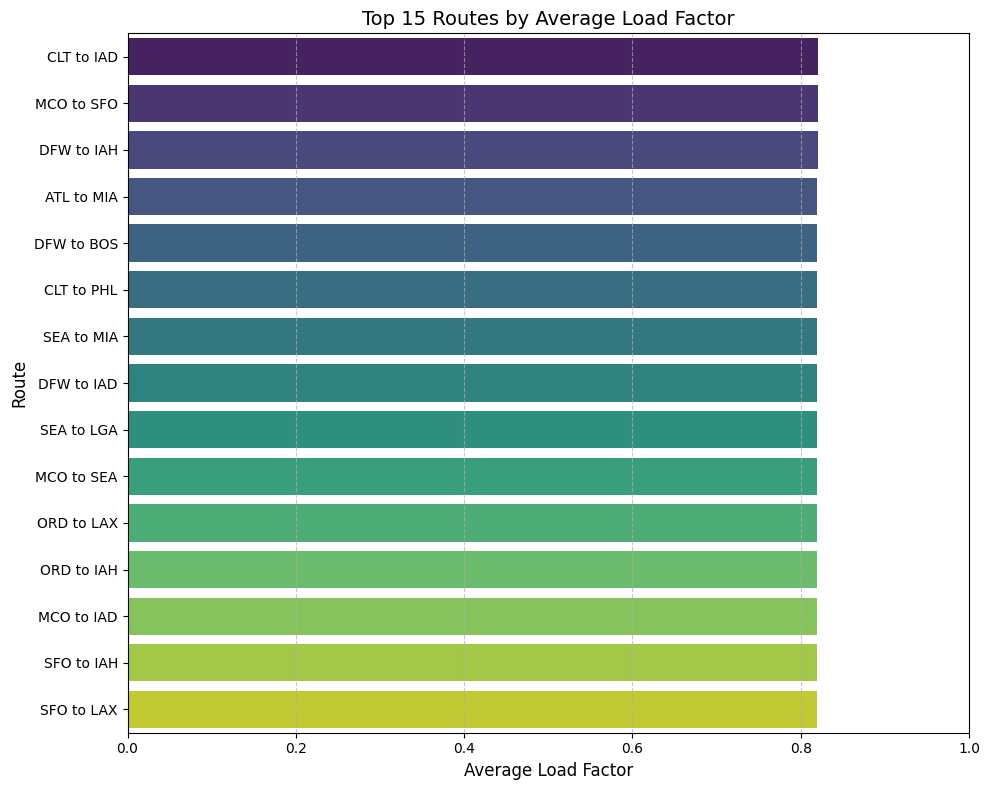

In [ ]:
#Prompt D
# Compute mean load factor by route (origin-dest pair)
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean()

# Take the top 15 routes by average load factor
top_15_routes = route_load_factor.sort_values(ascending=False).head(15)

# Create route labels for plotting
top_15_routes.index = [f"{o} to {d}" for o, d in top_15_routes.index]

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x=top_15_routes.values, y=top_15_routes.index, palette='viridis')

plt.title('Top 15 Routes by Average Load Factor', fontsize=14)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.xlim(0, 1) # Load factor is a percentage, so limit x-axis to 0-1
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

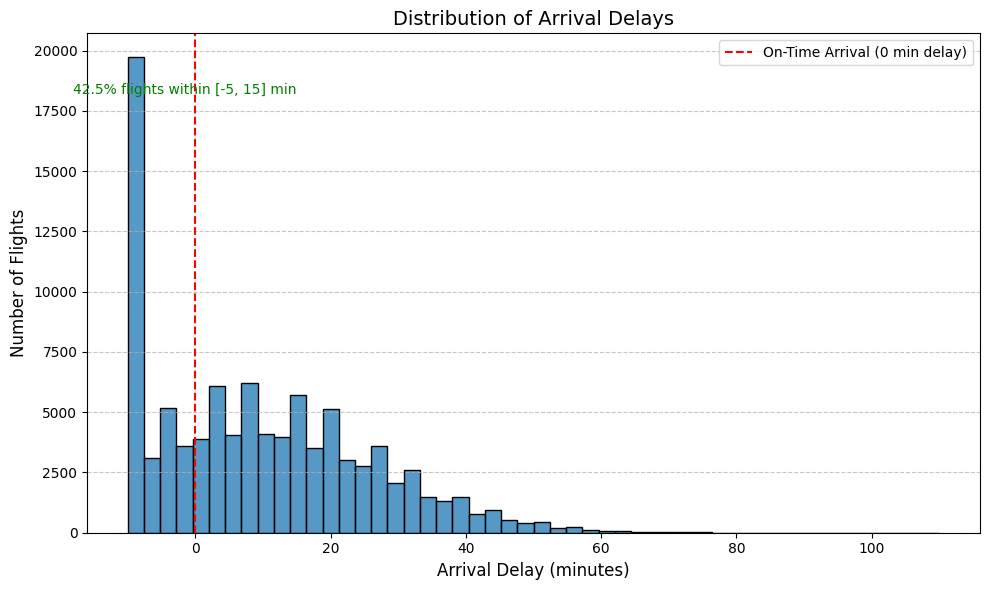

In [ ]:
#promptC
# Plotting histogram of arrival delays
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=False)

# Add a vertical line at 0
plt.axvline(0, color='red', linestyle='--', label='On-Time Arrival (0 min delay)')

# Calculate percentage of flights within [-5, 15] minutes
on_time_flights_count = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)].shape[0]
total_flights_count = df_flights.shape[0]
percentage_on_time = (on_time_flights_count / total_flights_count) * 100

# Annotate the percentage on the plot
plt.text(15, plt.gca().get_ylim()[1] * 0.9, f'{percentage_on_time:.1f}% flights within [-5, 15] min',
         color='green', ha='right', va='top')

plt.title('Distribution of Arrival Delays', fontsize=14)
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

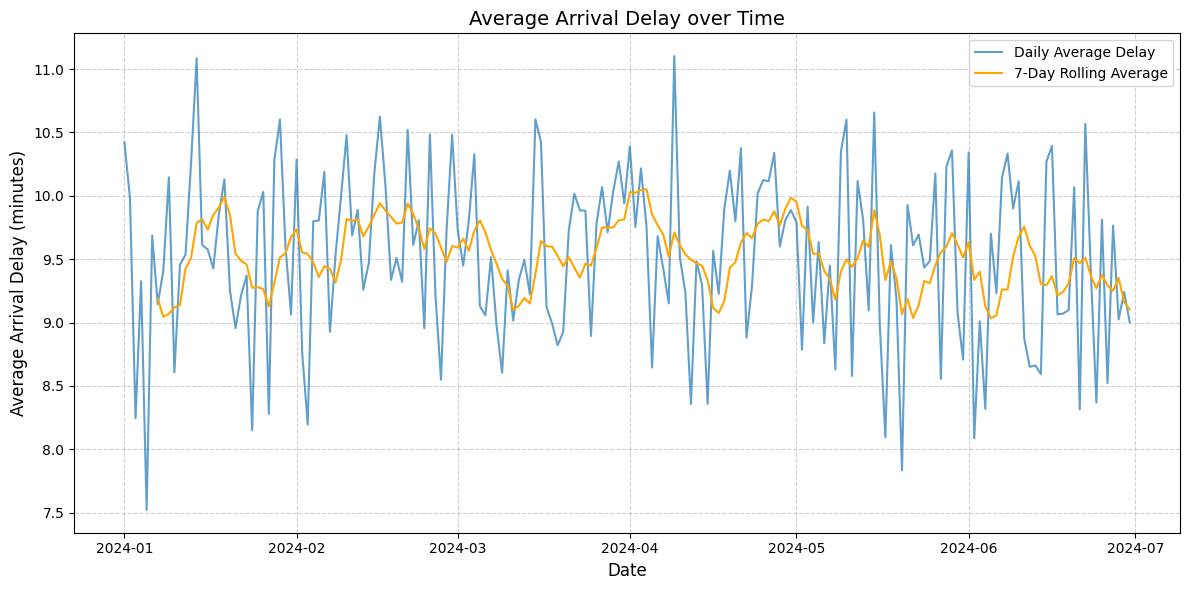

In [ ]:
# Aggregate to daily average arrival delay
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()

# Calculate 7-day rolling average
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='orange')  #it's 7 days bc easier to see the pattern

plt.title('Average Arrival Delay over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-1477209902.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')


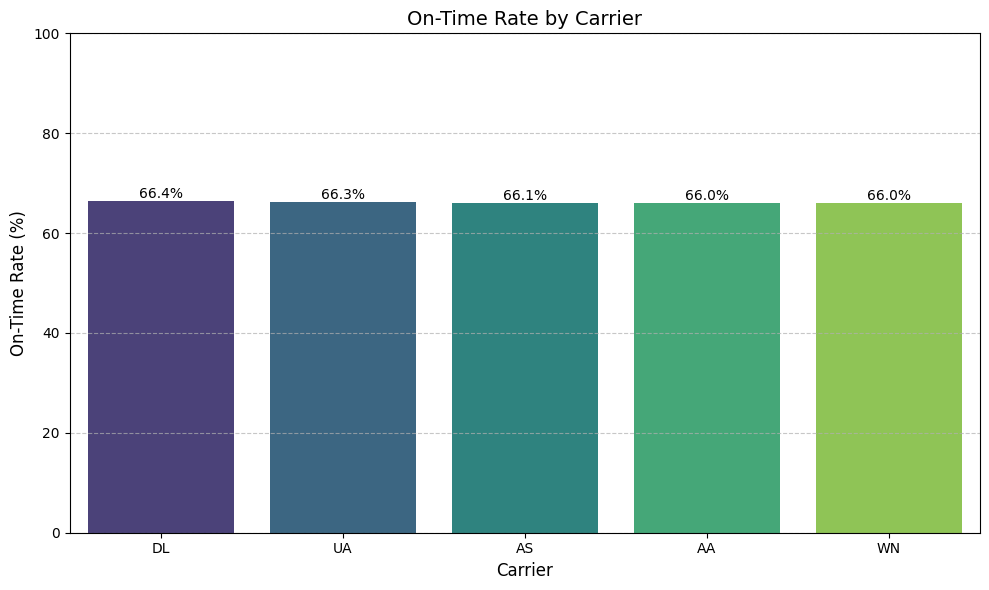

In [ ]:
#Prompt A
# Compute On-Time Rate by carrier
on_time_rate_by_carrier = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

# Plotting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_rate_by_carrier.index, y=on_time_rate_by_carrier.values, palette='viridis')

# Add percentage labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('On-Time Rate by Carrier', fontsize=14)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### (Optional) Bring Your Own BigQuery Data
If you have airline or operations data in BigQuery, you may connect from Colab. Otherwise, skip to the **Export & Looker Studio** section.

**Auth & Client Setup (run in Colab):**
```python
from google.colab import auth
auth.authenticate_user()
print('✅ Authenticated')

from google.cloud import bigquery
client = bigquery.Client(project='YOUR_PROJECT_ID')
```

**Example Query Skeleton:**
```sql
SELECT date, carrier, origin, dest, distance_miles, seats, passengers,
       dep_delay_min, arr_delay_min, cancelled, diverted, revenue_usd, cost_usd
FROM `your_dataset.your_table`
WHERE date BETWEEN '2024-01-01' AND '2024-06-30'
```

Load to pandas:
```python
query = """
-- paste your SQL here
"""
df_bq = client.query(query).to_dataframe()
df_bq.head()
```

Unify columns with the synthetic schema if you want to reuse prompts/plots:
```python
# Example: ensure `on_time`, `load_factor`, and `casm` exist if needed
df_bq['on_time'] = (df_bq['arr_delay_min'] <= 15).astype(int)
df_bq['load_factor'] = (df_bq['passengers'] / df_bq['seats']).round(3)
df_bq['asm'] = df_bq['seats'] * df_bq['distance_miles']
df_bq['casm'] = (df_bq['cost_usd'] / df_bq['asm']).round(4)
```


### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**
The design decision that most improved the dashboard's clarity was the strategic use of time series charts directly below the Revenue and NPS scorecards. This provided immediate context for whether the current KPI value was trending positively or negatively over time, offering a more complete picture than a static number alone. To improve the dashboard next, I would change the color coding on the Load Factor gauge chart. I would define explicit red, yellow, and green zones based on industry benchmarks (ex: green for 80%+ load factor) to instantly convey whether the current performance is good, satisfactory, or poor, making the data more actionable.
---
### Checklist
- [✅] Q1–Q3 answered in Tuesday section  
- [✅] 3–5 visualizations generated with **Gemini** in Colab  
- [✅] Synthetic or BigQuery data connected to **Looker Studio**  
- [✅] Dashboard with **filters** and **KPI cards**  
- [✅] Reflection complete  
